# **AI ASSIGNMENT 3**


```
Submitted By:
  Aleezeh Usman
  18I--0529

Due Date: 10th June 2021
```



## Getting and setting up the data set

Data Set Used: **DRY_BEANS_DATASET.XLSX**

Attributes:


1. Area (A): The area of a bean zone and the number of pixels within its boundaries.
2. Perimeter (P): Bean circumference is defined as the length of its border.
3. Major axis length (L): The distance between the ends of the longest line that can be drawn from a bean.
4. Minor axis length (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.
5. Aspect ratio (K): Defines the relationship between L and l.
6. Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.
7. Convex area (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
8. Equivalent diameter (Ed): The diameter of a circle having the same area as a bean seed area.
9. Extent (Ex): The ratio of the pixels in the bounding box to the bean area.
10. Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
11. Roundness (R): Calculated with the following formula: (4piA)/(P^2)
12. Compactness (CO): Measures the roundness of an object: Ed/L
13. ShapeFactor1 (SF1)
14. ShapeFactor2 (SF2)
15. ShapeFactor3 (SF3)
16. ShapeFactor4 (SF4)
17. Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)





*(CLASS IS THE MOST IMPORTANT)* 

IMPORTANT POINTS
- Use of Numpy Array to store our imported data

In [ ]:
import numpy as np
from numpy import random
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# To store dataset in a Pandas Dataframe
import io
from google.colab import files
uploaded = files.upload()


Saving Dry_Bean_Dataset.xlsx to Dry_Bean_Dataset (2).xlsx


In [ ]:
pd_X = pd.read_excel(io.BytesIO(uploaded['Dry_Bean_Dataset.xlsx']))
fulldata = np.array(pd_X)
np.random.shuffle(fulldata)
X = fulldata[0:500,:].copy()     #training data set
testdata = fulldata[1000:1500,:].copy()    #testdata


COMPUTATION OF EUCLIDEAN DISTANCE BY USING THE MATH FORMULA :
- **(x1,x2) - (y1,y2) - > ((x1-y1)^2 + (x2-y2)^2)^1/2** 

In [ ]:
def FindEuclideanDistance(x,y):
  term1 = (x[0]-y[0])**2
  term2 = (x[1]-y[1])**2
  term3 = (x[2]-y[2])**2
  term4 = (x[3]-y[3])**2
  term5 = (x[4]-y[4])**2
  term6 = (x[5]-y[5])**2
  term7 = (x[6]-y[6])**2
  term8 = (x[7]-y[7])**2
  term9 = (x[8]-y[8])**2
  term10 = (x[9]-y[9])**2
  term11 = (x[10]-y[10])**2
  term12 = (x[11]-y[11])**2
  term13 = (x[12]-y[12])**2
  term14 = (x[13]-y[13])**2
  term15 = (x[14]-y[14])**2
  term16 = (x[15]-y[15])**2

  eu_dist = (term1 + term2 + term3 + term4 + term5 + term6 + term7 + term8 + term9 + term10 + term11 + term12 + term13 + term14 + term15 + term16)**(1/2)
  return eu_dist

# **K-Mean Clustering Implementation**

IMPORTANT:
- Initial Centroids will be the first data point of each distinctive class

In [ ]:
#setting up initial centroids
storepandarow = []
for i in range(len(X)):
  if (X[i][16] == 'SEKER'):
    storepandarow.append(X[i].copy())
    break

for i in range(len(X)):
  if (X[i][16] == 'BARBUNYA'):
    storepandarow.append(X[i].copy())
    break

for i in range(len(X)):
  if (X[i][16] == 'BOMBAY'):
    storepandarow.append(X[i].copy())
    break

for i in range(len(X)):
  if (X[i][16] == 'CALI'):
    storepandarow.append(X[i].copy())
    break

for i in range(len(X)):
  if (X[i][16] == 'DERMASON'):
    storepandarow.append(X[i].copy())
    break

for i in range(len(X)):
  if (X[i][16] == 'HOROZ'):
    storepandarow.append(X[i].copy())
    break

for i in range(len(X)):
  if (X[i][16] == 'SIRA'):
    storepandarow.append(X[i].copy())
    break


initial_centroids = np.array(storepandarow)
print(initial_centroids)

[[41251 743.0169999999999 250.64831039045086 209.90982427583037
  1.1940761289051836 0.5464870693688317 41836 229.17767007252297
  0.7937158469945356 0.9860168276125825 0.9389594654596868
  0.9143395768976791 0.006076175374910932 0.0026196310953308785
  0.8360168618814269 0.9982677781348337 'SEKER']
 [71536 1020.47 341.89852248692176 267.1090836836476 1.2799958645054974
  0.6242151020008998 72443 301.79871449722015 0.790260931044387
  0.9874798117140372 0.8632449234384865 0.8827142986813127
  0.0047793911105865824 0.001789917361415484 0.7791845330964416
  0.9973529800500921 'BARBUNYA']
 [146153 1476.3829999999998 526.1933263932928 356.52828795597384
  1.4758810006634597 0.7354662103148757 149267 431.3789276050445
  0.7319360977564102 0.9791380546269437 0.8425962592026347
  0.8198107158862348 0.0036002909717439448 0.0010031635118937547
  0.6720896098819007 0.9919242859680139 'BOMBAY']
 [84156 1125.18 435.70008509032346 247.4989462743194 1.7604118791172887
  0.8229948162196264 85328 327.

Two Most Important Functions Used in K-Means Clustering:
- Finding Closest Centroids using euclidean distance
- Updating Centroids by finding average of the entire cluster

In [ ]:
# Assign every training example x^(i) to its closest centroid, given the current centroid positions
def find_closest_centroids(X, centroids):
  m = len(X) # no of datapoints
  idx = np.zeros(m) # array to assign the centriod
    
  # Your Code Here
  for i in range (m):
    tempdist = list()
    for j in range(7):
      tempdist.append(FindEuclideanDistance(X[i],initial_centroids[j]))
    distances = np.array(tempdist)
    min_dist = np.argmin(distances)                                         #return the cluster number with minimum dist
    idx[i] = min_dist                                                       #store assigned cluster number in a corresponding array
    
  return idx

# Update Centroids
def compute_centroids(X, idx, k):
  m = len(X)
  centroids = np.zeros((k, 16))  #7*16
  '''Return Updated Values of all K centroids'''
  
  # Your Code Here
  for i in range(k):
    cols = list()
    for j in range(16):
      cols.append(0)
    total = 0
    for k in range(m):
      if idx[k] == i:                             #for the categorized clusters add each column and then divide from total number of points in that specific cluster
        for j in range(16):
          cols[j] += X[k][j]
        total += 1
    if total != 0:
      for j in range(16):
        cols[j] = cols[j]/total
        centroids[i][j] = cols[j]

  return centroids   

In [ ]:
def run_k_means(X, initial_centroids, max_iters):
  m = len(X)
  k = initial_centroids.shape[0]
  idx = np.zeros(m)
  centroids = initial_centroids

  for i in range(max_iters):
    # find closest centroid
    idx = find_closest_centroids(X, centroids)
    #update centroids
    centroids = compute_centroids(X, idx, k)

  return idx, centroids
 

In [ ]:
np.random.shuffle(X)
"""
cluster1 = X[0:1944,:]
cluster2 = X[1944:3888,:]
cluster3 = X[3888:5832,:]
cluster4 = X[5832:7776,:]
cluster5 = X[7776:9720,:]
cluster6 = X[9720:11664,:]
cluster7 = X[11664:13610,:]
"""
cluster1 = X[0:71,:]
cluster2 = X[71:142,:]
cluster3 = X[142:213,:]
cluster4 = X[213:284,:]
cluster5 = X[284:355,:]
cluster6 = X[355:426,:]
cluster7 = X[426:500,:]
idx, centroids = run_k_means(X, initial_centroids, 100)# use 2000 max iterations to perform clustering

# **K-Means Clustering Visualization**
Using Matplotlib

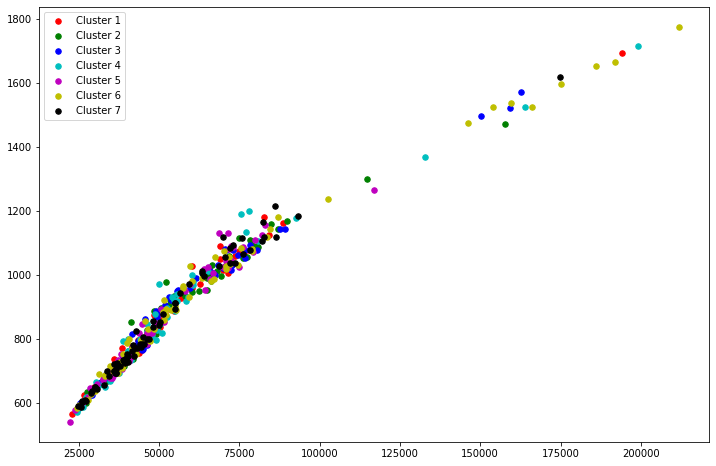

In [ ]:
k_Meancluster1 = X[np.where(idx == 0)[0],:]
k_Meancluster2 = X[np.where(idx == 1)[0],:]
k_Meancluster3 = X[np.where(idx == 2)[0],:]
k_Meancluster4 = X[np.where(idx == 3)[0],:]
k_Meancluster5 = X[np.where(idx == 4)[0],:]
k_Meancluster6 = X[np.where(idx == 5)[0],:]
k_Meancluster7 = X[np.where(idx == 6)[0],:]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='r', label='Cluster 1')
ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='g', label='Cluster 2')
ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='b', label='Cluster 3')
ax.scatter(cluster4[:,0], cluster4[:,1], s=30, color='c', label='Cluster 4')
ax.scatter(cluster5[:,0], cluster5[:,1], s=30, color='m', label='Cluster 5')
ax.scatter(cluster6[:,0], cluster6[:,1], s=30, color='y', label='Cluster 6')
ax.scatter(cluster7[:,0], cluster7[:,1], s=30, color='k', label='Cluster 7')

ax.legend()


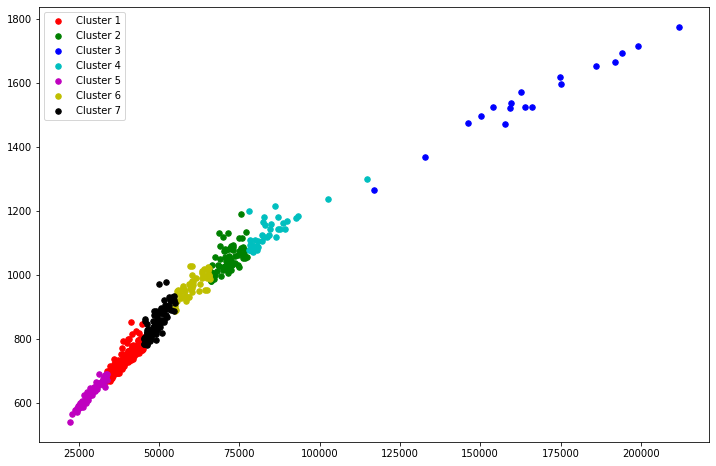

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(k_Meancluster1[:,0], k_Meancluster1[:,1], s=30, color='r', label='Cluster 1')
ax.scatter(k_Meancluster2[:,0], k_Meancluster2[:,1], s=30, color='g', label='Cluster 2')
ax.scatter(k_Meancluster3[:,0], k_Meancluster3[:,1], s=30, color='b', label='Cluster 3')
ax.scatter(k_Meancluster4[:,0], k_Meancluster4[:,1], s=30, color='c', label='Cluster 4')
ax.scatter(k_Meancluster5[:,0], k_Meancluster5[:,1], s=30, color='m', label='Cluster 5')
ax.scatter(k_Meancluster6[:,0], k_Meancluster6[:,1], s=30, color='y', label='Cluster 6')
ax.scatter(k_Meancluster7[:,0], k_Meancluster7[:,1], s=30, color='k', label='Cluster 7')


ax.legend()

# **DB INDEX EVALUATION OF K-MEANS**

In [ ]:
def interclusterdist(i, x, idx):
  m = len(x)
  maxdist = -1
  d = 0
  total = 0
  
  for k1 in range(m):
    if idx[k1] == i:
      for k2 in range(m):
        if idx[k2] == i and k1 != k2 :
          d += FindEuclideanDistance(X[k1],X[k2])
          total += 1
    
  if(total != 0):
    return d/total
  else :
    print(i)
    return 0

def intraclusterdist(i, j, centroids):
   return FindEuclideanDistance(centroids[i],centroids[j])


In [ ]:
def compute_DB_index(X, clusters, nc):
  sigmax = 0
  for i in range(nc):
    sigmai = interclusterdist(i,X,idx)
    maxval = -9999
    for j in range(nc):
      if i != j:
        sigmaj = interclusterdist(j,X,idx)
        distbetweenclusters = intraclusterdist(i,j,centroids)
        storeval = (sigmai+sigmaj)/distbetweenclusters
        if storeval > maxval:
          maxval = storeval
    sigmax += maxval

  return sigmax/nc

In [ ]:
compute_DB_index(X,centroids, 7)

0.6748405984600827

# **KNN IMPLEMENTATION**

In [ ]:
#Reset the data
X = fulldata[0:500,:].copy()     #training data set
testdata = fulldata[1000:1500,:].copy()    #testdata
"""
cluster1 = testdata[0:659,:]
cluster2 = testdata[659:1318,:]
cluster3 = testdata[1318:1977,:]
cluster4 = testdata[1977:2636,:]
cluster5 = testdata[2636:3295,:]
cluster6 = testdata[3295:3954,:]
cluster7 = testdata[3954:4609,:]
"""
cluster1 = X[0:71,:]
cluster2 = X[71:142,:]
cluster3 = X[142:213,:]
cluster4 = X[213:284,:]
cluster5 = X[284:355,:]
cluster6 = X[355:426,:]
cluster7 = X[426:500,:]

In [ ]:
def classification_by_closest_neighbour(X, datapoint, k):
  m = len(X)
  distances = list()

  for i in range(m):
    dist = FindEuclideanDistance(datapoint,X[i])
    distances.append([X[i],dist])

  distances.sort(key = lambda x: x[1])
  closestneighbours = list()
  for i in range(k):
    closestneighbours.append(distances[i][0][16])

  return max(set(closestneighbours), key = closestneighbours.count)

In [ ]:
def KNN(X,testdata):
  k = 200                                                                       #number of closest neighbours to chose from
  m = len(testdata)
  classes = list()
  idx = np.empty(m,dtype = object)

  for i in range(m):
    foundclass = classification_by_closest_neighbour(X,testdata[i],k)
    idx[i] = foundclass

  return idx
  

In [ ]:
storeclasses = KNN(X,testdata)

# **KNN VISUALIZATION**

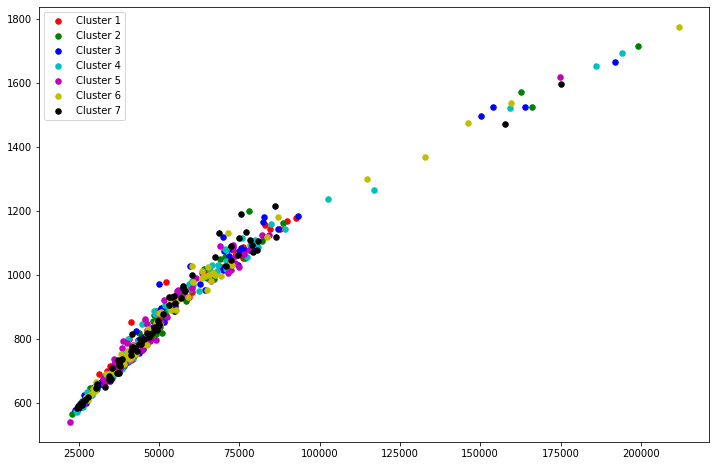

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='r', label='Cluster 1')
ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='g', label='Cluster 2')
ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='b', label='Cluster 3')
ax.scatter(cluster4[:,0], cluster4[:,1], s=30, color='c', label='Cluster 4')
ax.scatter(cluster5[:,0], cluster5[:,1], s=30, color='m', label='Cluster 5')
ax.scatter(cluster6[:,0], cluster6[:,1], s=30, color='y', label='Cluster 6')
ax.scatter(cluster7[:,0], cluster7[:,1], s=30, color='k', label='Cluster 7')

ax.legend()


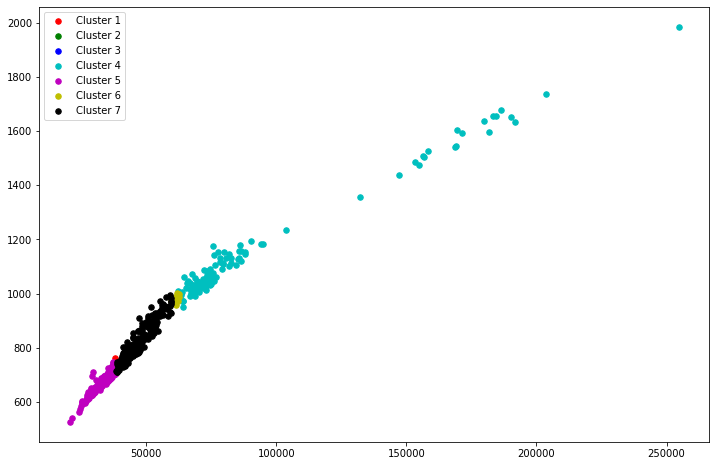

In [ ]:
k_Meancluster1 = testdata[np.where(storeclasses == "SEKER")[0],:]
k_Meancluster2 = testdata[np.where(storeclasses == "BURBUNYA")[0],:]
k_Meancluster3 = testdata[np.where(storeclasses == "BOMBAY")[0],:]
k_Meancluster4 = testdata[np.where(storeclasses == "CALI")[0],:]
k_Meancluster5 = testdata[np.where(storeclasses == "DERMASON")[0],:]
k_Meancluster6 = testdata[np.where(storeclasses == "HOROZ")[0],:]
k_Meancluster7 = testdata[np.where(storeclasses == "SIRA")[0],:]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(k_Meancluster1[:,0], k_Meancluster1[:,1], s=30, color='r', label='Cluster 1')
ax.scatter(k_Meancluster2[:,0], k_Meancluster2[:,1], s=30, color='g', label='Cluster 2')
ax.scatter(k_Meancluster3[:,0], k_Meancluster3[:,1], s=30, color='b', label='Cluster 3')
ax.scatter(k_Meancluster4[:,0], k_Meancluster4[:,1], s=30, color='c', label='Cluster 4')
ax.scatter(k_Meancluster5[:,0], k_Meancluster5[:,1], s=30, color='m', label='Cluster 5')
ax.scatter(k_Meancluster6[:,0], k_Meancluster6[:,1], s=30, color='y', label='Cluster 6')
ax.scatter(k_Meancluster7[:,0], k_Meancluster7[:,1], s=30, color='k', label='Cluster 7')

ax.legend()

# **EVALUATION METRICS**
- DB Index for K - Means
- For KNN: 
- - Accuracy
- - Precision
- - Recall
- - F1-measure

In [ ]:
def GetAccuracy(testdata, storeclasses):
  count = 0
  for i in range(len(testdata)):                                  #counting total number of correct labels
    if testdata[i][16] == storeclasses[i]:
      count+=1
  acc = count/len(testdata)
  print("Accuracy: ", end = "")
  print(acc)

In [ ]:
def GetPrecision(testdata, storeclasses):
  countSeker = 0
  countBarbunya = 0
  countBombay = 0
  countCali = 0
  countDermosan = 0
  countHoroz = 0
  countSira = 0
  totalSeker = np.count_nonzero(storeclasses == "SEKER")
  totalBarbunya = np.count_nonzero(storeclasses == "BARBUNYA")
  totalBombay = np.count_nonzero(storeclasses == "BOMBAY")
  totalCali = np.count_nonzero(storeclasses == "CALI")
  totalDermosan = np.count_nonzero(storeclasses == "DERMASON")
  totalHoroz = np.count_nonzero(storeclasses == "HOROZ")
  totalSira = np.count_nonzero(storeclasses == "SIRA")

  for i in range(len(testdata)):
    if testdata[i][16] == storeclasses[i]:
      if testdata[i][16] == 'SEKER':
        countSeker += 1
      elif testdata[i][16] == 'BARBUNYA':
        countBarbunya += 1
      elif testdata[i][16] == 'BOMBAY':
        countBombay += 1
      elif testdata[i][16] == 'CALI':
        countCali += 1
      elif testdata[i][16] == 'DERMASON':
        countDermosan += 1
      elif testdata[i][16] == 'HOROZ':
        countHoroz += 1
      elif testdata[i][16] == 'SIRA':
        countSira += 1

    
  print("PRECISION FOR EACH CLASS")
  if totalSeker != 0:
    print("- SEKER: " + str(countSeker/totalSeker))
  if totalBarbunya != 0:
    print("- BARBUNYA: " + str(countBarbunya/totalBarbunya))
  if totalBombay != 0:
    print("- BOMBAY: " + str(countBombay/totalBombay))
  if totalCali != 0:
    print("- CALI: " + str(countCali/totalCali))
  if totalDermosan != 0:
    print("- DERMASON: " + str(countDermosan/totalDermosan))
  if totalHoroz != 0:
    print("- HOROZ: " + str(countHoroz/totalHoroz))
  if totalSira != 0:
    print("- SIRA: " + str(countSira/totalSira))
  print("OVERALL PRECISION: " + str((countSeker+countBarbunya+countBombay+countCali+countDermosan+countHoroz+countSira)/(totalSeker+totalBarbunya+totalBombay+totalCali+totalDermosan+totalHoroz+totalSira)))
  

In [ ]:
def GetRecall(storeclasses, testdata):
  countSeker = 0
  countBarbunya = 0
  countBombay = 0
  countCali = 0
  countDermosan = 0
  countHoroz = 0
  countSira = 0
  totalSeker = np.count_nonzero(testdata == "SEKER")
  totalBarbunya = np.count_nonzero(testdata == "BARBUNYA")
  totalBombay = np.count_nonzero(testdata == "BOMBAY")
  totalCali = np.count_nonzero(testdata == "CALI")
  totalDermosan = np.count_nonzero(testdata == "DERMASON")
  totalHoroz = np.count_nonzero(testdata == "HOROZ")
  totalSira = np.count_nonzero(testdata == "SIRA")

  for i in range(len(testdata)):
    if testdata[i][16] == storeclasses[i]:
      if testdata[i][16] == 'SEKER':
        countSeker += 1
      elif testdata[i][16] == 'BARBUNYA':
        countBarbunya += 1
      elif testdata[i][16] == 'BOMBAY':
        countBombay += 1
      elif testdata[i][16] == 'CALI':
        countCali += 1
      elif testdata[i][16] == 'DERMASON':
        countDermosan += 1
      elif testdata[i][16] == 'HOROZ':
        countHoroz += 1
      elif testdata[i][16] == 'SIRA':
        countSira += 1

  print("RECALL FOR EACH CLASS")
  if totalSeker != 0:
    print("- SEKER: " + str(countSeker/totalSeker))
  if totalBarbunya != 0:
    print("- BARBUNYA: " + str(countBarbunya/totalBarbunya))
  if totalBombay != 0:
    print("- BOMBAY: " + str(countBombay/totalBombay))
  if totalCali != 0:
    print("- CALI: " + str(countCali/totalCali))
  if totalDermosan != 0:
    print("- DERMASON: " + str(countDermosan/totalDermosan))
  if totalHoroz != 0:
    print("- HOROZ: " + str(countHoroz/totalHoroz))
  if totalSira != 0:
    print("- SIRA: " + str(countSira/totalSira))
  print("OVERALL RECALL: " + str((countSeker+countBarbunya+countBombay+countCali+countDermosan+countHoroz+countSira)/(totalSeker+totalBarbunya+totalBombay+totalCali+totalDermosan+totalHoroz+totalSira)))

In [ ]:
def GetF1Measure(storeclasses, testdata):
  countSeker = 0
  countBarbunya = 0
  countBombay = 0
  countCali = 0
  countDermosan = 0
  countHoroz = 0
  countSira = 0
  r_totalSeker = np.count_nonzero(testdata == "SEKER")
  r_totalBarbunya = np.count_nonzero(testdata == "BARBUNYA")
  r_totalBombay = np.count_nonzero(testdata == "BOMBAY")
  r_totalCali = np.count_nonzero(testdata == "CALI")
  r_totalDermosan = np.count_nonzero(testdata == "DERMASON")
  r_totalHoroz = np.count_nonzero(testdata == "HOROZ")
  r_totalSira = np.count_nonzero(testdata == "SIRA")
  p_totalSeker = np.count_nonzero(storeclasses == "SEKER")
  p_totalBarbunya = np.count_nonzero(storeclasses == "BARBUNYA")
  p_totalBombay = np.count_nonzero(storeclasses == "BOMBAY")
  p_totalCali = np.count_nonzero(storeclasses == "CALI")
  p_totalDermosan = np.count_nonzero(storeclasses == "DERMASON")
  p_totalHoroz = np.count_nonzero(storeclasses == "HOROZ")
  p_totalSira = np.count_nonzero(storeclasses == "SIRA")

  for i in range(len(testdata)):
    if testdata[i][16] == storeclasses[i]:
      if testdata[i][16] == 'SEKER':
        countSeker += 1
      elif testdata[i][16] == 'BARBUNYA':
        countBarbunya += 1
      elif testdata[i][16] == 'BOMBAY':
        countBombay += 1
      elif testdata[i][16] == 'CALI':
        countCali += 1
      elif testdata[i][16] == 'DERMASON':
        countDermosan += 1
      elif testdata[i][16] == 'HOROZ':
        countHoroz += 1
      elif testdata[i][16] == 'SIRA':
        countSira += 1

  #RECALL FOR EACH CLASS
  if r_totalSeker != 0:
    r_seker = countSeker/r_totalSeker
  else:
    r_seker = 0
  if r_totalBarbunya != 0:
    r_barbunya = countBarbunya/r_totalBarbunya
  else:
    r_totalBarbunya = 0
  if r_totalBombay != 0:
    r_bombay = countBombay/r_totalBombay
  else:
    r_bombay = 0
  if r_totalCali != 0:
    r_cali = countCali/r_totalCali
  else:
    r_cali = 0
  if r_totalDermosan != 0:
    r_dermosan = countDermosan/r_totalDermosan
  else:
    r_dermosan = 0
  if r_totalHoroz != 0:
    r_horoz = countHoroz/r_totalHoroz
  else:
    r_horoz = 0
  if r_totalSira != 0:
    r_sira = countSira/r_totalSira
  else:
    r_sira =  0
  #precision for each class
  if p_totalSeker != 0:
    p_seker = countSeker/p_totalSeker
  else:
    p_seker = 0
  if p_totalBarbunya != 0:
    p_barbunya = countBarbunya/p_totalBarbunya
  else:
    p_barbunya = 0
  if p_totalBombay != 0:
    p_bombay = countBombay/p_totalBombay
  else:
    p_bombay = 0
  if p_totalCali != 0:
    p_cali = countCali/p_totalCali
  else:
    p_cali = 0
  if p_totalDermosan != 0:
    p_dermosan = countDermosan/p_totalDermosan
  else:
    p_dermosan = 0
  if p_totalHoroz != 0:
    p_horoz = countHoroz/p_totalHoroz
  else:
    p_horoz = 0
  if p_totalSira != 0:
    p_sira = countSira/p_totalSira
  else:
    p_sira = 0

  print("F1 Measure for each class")
  if (r_seker+p_seker != 0):
    print("- SEKER: " + str((2*r_seker*p_seker)/(r_seker+p_seker)))
  if (r_barbunya + p_barbunya) != 0:
    print("- BARBUNYA: " + str((2*r_barbunya*p_barbunya)/(r_barbunya+p_barbunya)))
  if (r_bombay + p_bombay) != 0:
    print("- BOMBAY: " + str((2*r_bombay*p_bombay)/(r_bombay+p_bombay)))
  if (r_cali + p_cali) != 0:
    print("- CALI: " + str((2*r_cali*p_cali)/(r_cali+p_cali)))
  if ( r_dermosan + p_dermosan) != 0:
    print("- DERMASON: " + str((2*r_dermosan*p_dermosan)/(r_dermosan+p_dermosan)))
  if ( r_horoz + p_horoz) != 0:
    print("- HOROZ: " + str((2*r_horoz*p_horoz)/(r_horoz+p_horoz)))
  if ( r_sira + p_sira) != 0:
    print("- SIRA: " + str((2*r_sira*p_sira)/(r_sira+p_sira)))
 # print("\nMACRO F1 - Score: ", end = "")
 # print(str( (((2*r_seker*p_seker)/(r_seker+p_seker))+((2*r_barbunya*p_barbunya)/(r_barbunya+p_barbunya))+((2*r_bombay*p_bombay)/(r_bombay+p_bombay))+((2*r_cali*p_cali)/(r_cali+p_cali))+((2*r_dermosan*p_dermosan)/(r_dermosan+p_dermosan))+((2*r_horoz*p_horoz)/(r_horoz+p_horoz))+(2*r_sira*p_sira)/(r_sira+p_sira))/7 ))



In [ ]:
def EvaluateKNN(storeclasses, testdata):
  print("When we are calculating the metrics globally all the measures become equal therefore:\nPrecision = Recall = Micro F1 = Accuracy")
  GetAccuracy(testdata, storeclasses)
  GetPrecision(testdata,storeclasses)
  GetRecall(storeclasses, testdata)
  GetF1Measure(storeclasses,testdata)

In [ ]:
EvaluateKNN(storeclasses, testdata)

When we are calculating the metrics globally all the measures become equal therefore:
Precision = Recall = Micro F1 = Accuracy
Accuracy: 0.536
PRECISION FOR EACH CLASS
- SEKER: 0.75
- CALI: 0.4727272727272727
- DERMASON: 0.7098765432098766
- HOROZ: 0.5384615384615384
- SIRA: 0.4312796208530806
OVERALL PRECISION: 0.536
RECALL FOR EACH CLASS
- SEKER: 0.03333333333333333
- BARBUNYA: 0.0
- BOMBAY: 0.0
- CALI: 0.9629629629629629
- DERMASON: 0.9349593495934959
- HOROZ: 0.0958904109589041
- SIRA: 0.9381443298969072
OVERALL RECALL: 0.536
F1 Measure for each class
- SEKER: 0.06382978723404256
- CALI: 0.6341463414634146
- DERMASON: 0.8070175438596491
- HOROZ: 0.1627906976744186
- SIRA: 0.5909090909090908
